In [1]:
import tensorflow
print(tensorflow.__version__)

2023-02-12 11:16:41.069321: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-12 11:16:41.246503: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-12 11:16:41.246560: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-12 11:16:42.242422: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

2.11.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()

In [5]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
X_train_full.shape

(60000, 28, 28)

In [10]:
y_train_full.shape

(60000,)

In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
y_test.shape

(10000,)

In [13]:
y_train_full[5000]

7

In [14]:
X_train_full[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

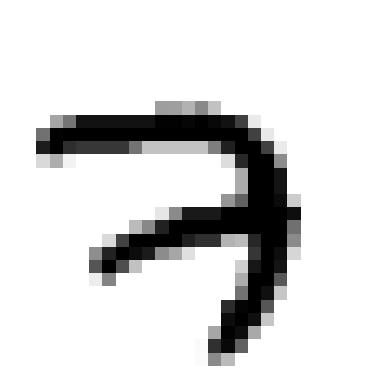

In [16]:
plt.imshow(X_train_full[5000],cmap='binary')
plt.axis("off")
plt.show()

<AxesSubplot: >

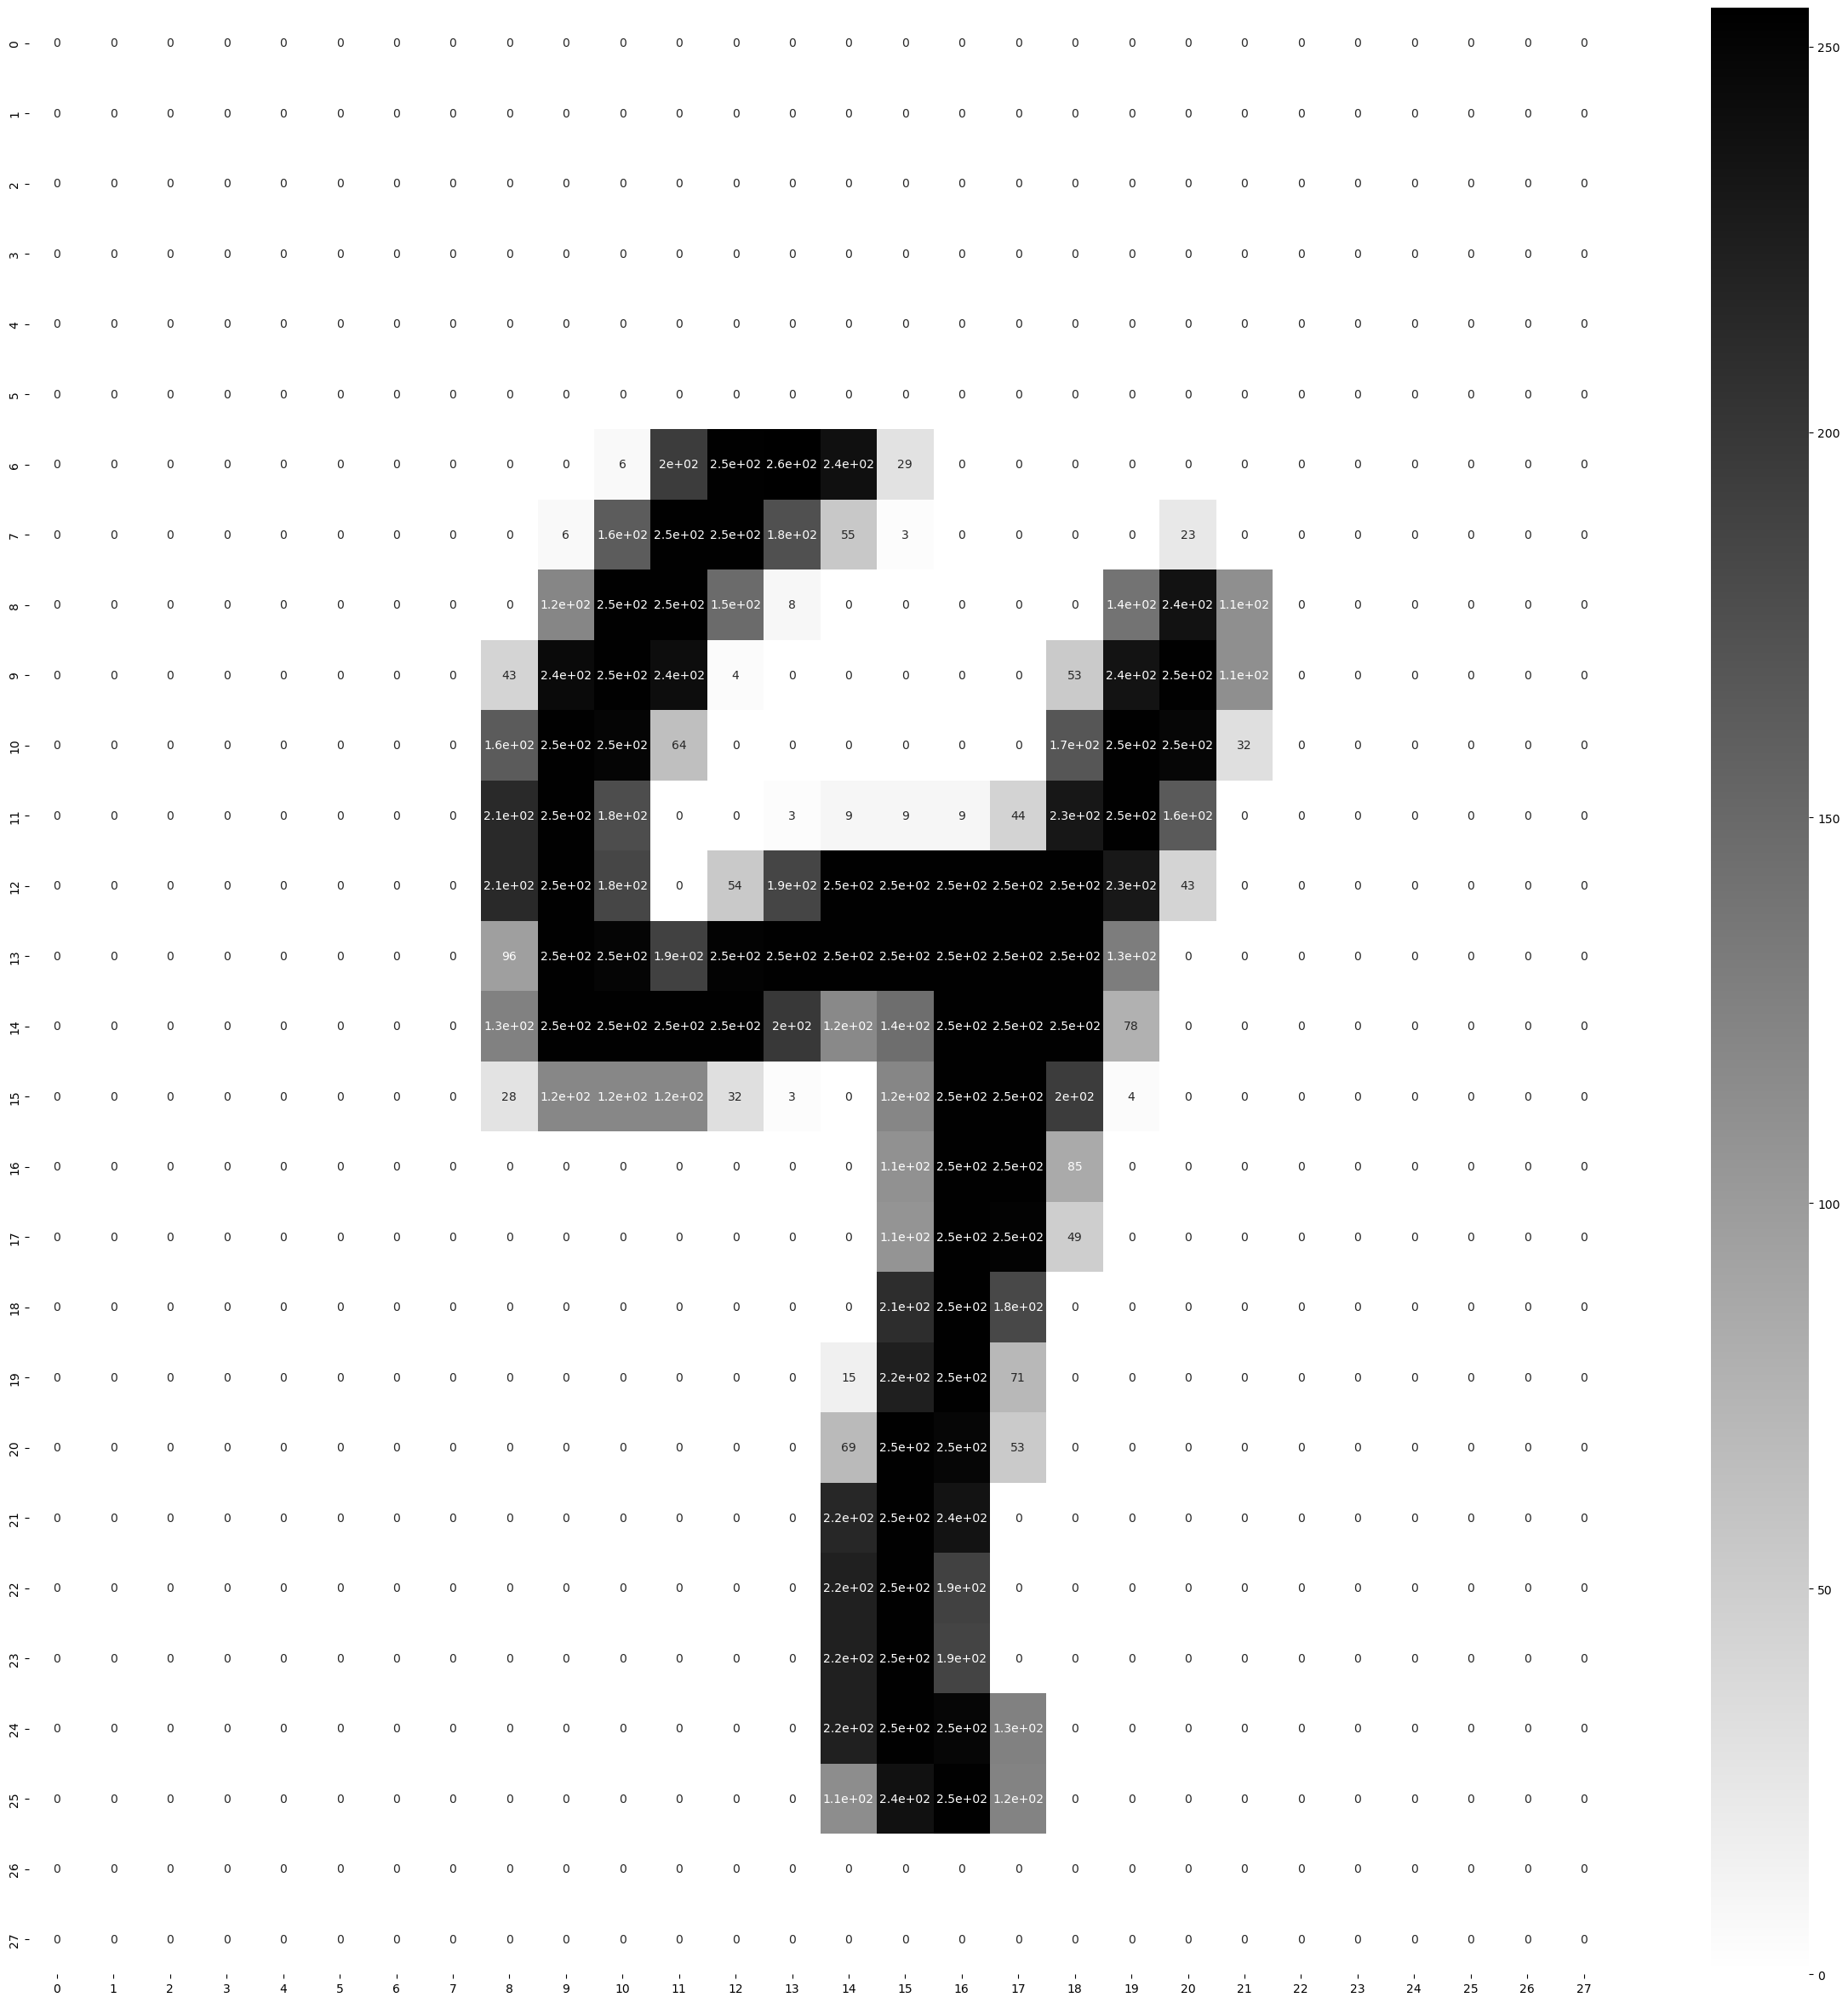

In [17]:
plt.figure(figsize=(30,30))
sns.heatmap(X_train_full[5002],annot=True,cmap="binary")

In [18]:
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
# Unit Scaling
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [19]:
0-255/255=[0,1]

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (2152828026.py, line 1)

In [20]:
# scale the test set as well
X_test = X_test / 255.

In [21]:
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)

(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)


<AxesSubplot: >

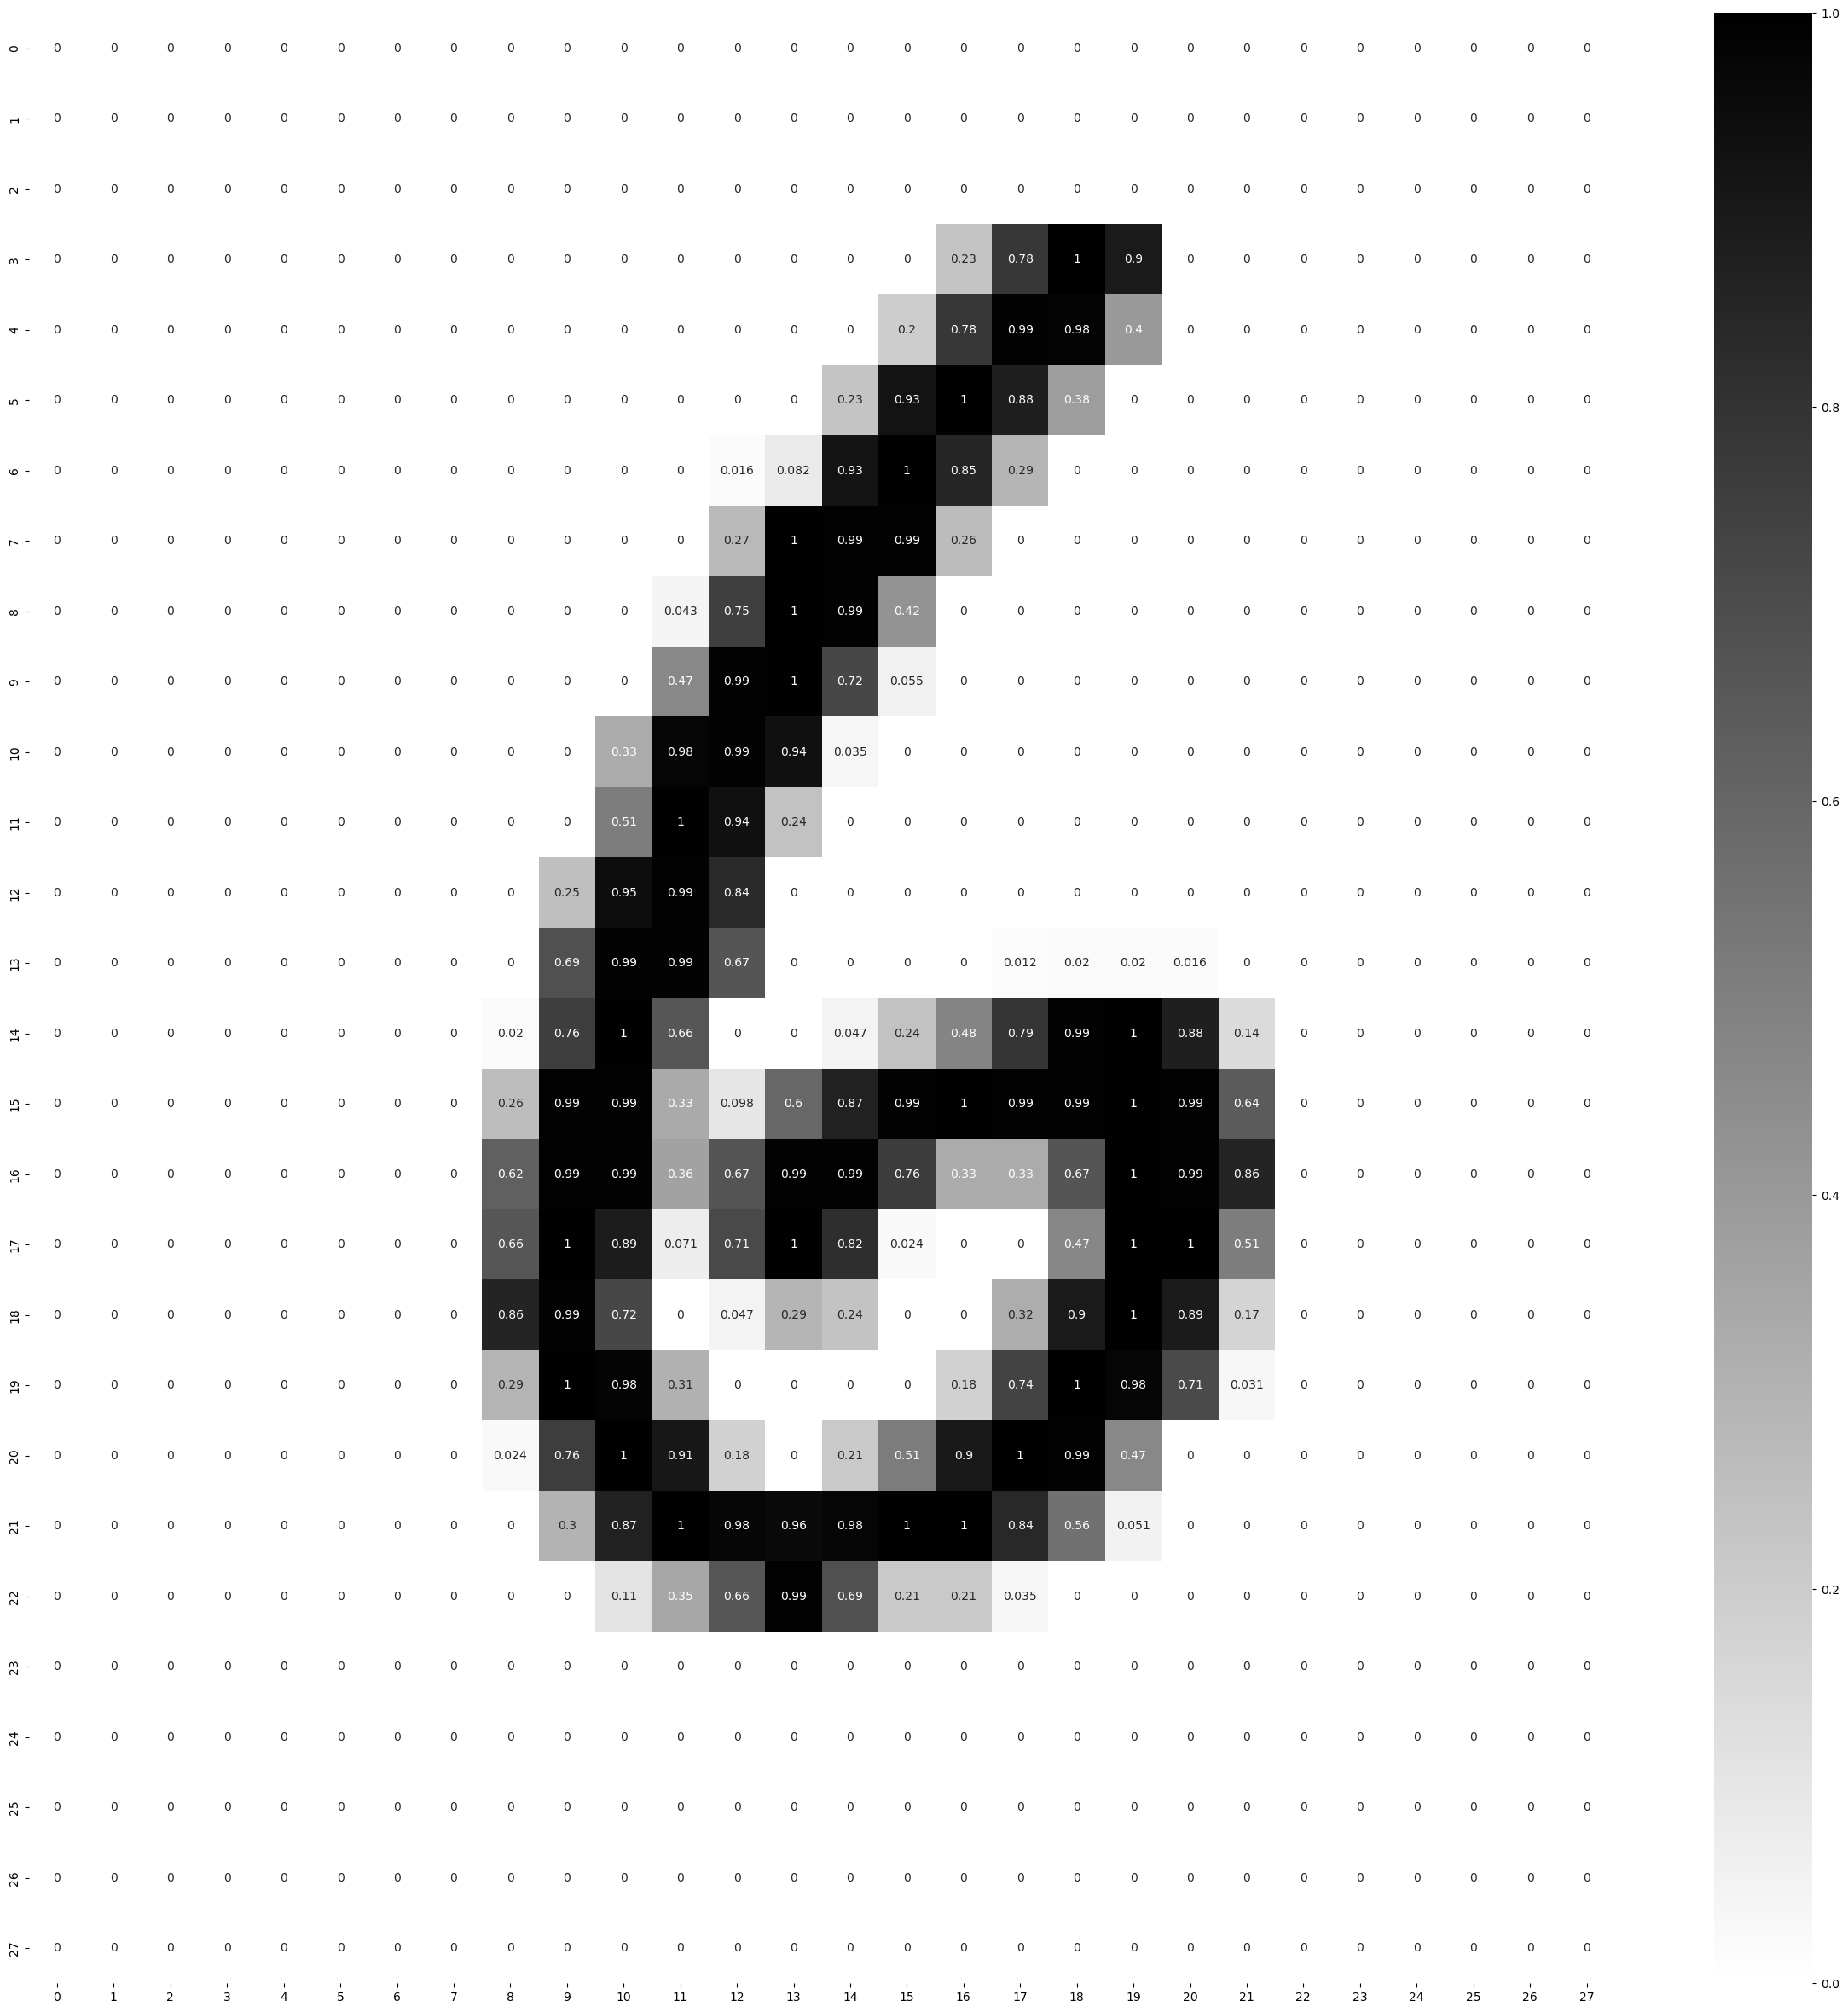

In [22]:
plt.figure(figsize=(30,30))
sns.heatmap(X_train[1000],annot=True,cmap="binary")

In [22]:
# you need to build a best to best model with hyperparameter tunning

# for the hyperparameter tuning you need to use keras tuner

In [23]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from kerastuner.tuners import RandomSearch

/tmp/ipykernel_13798/3085917358.py:6: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [24]:
def build_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape=[28,28], name="inputlayer"))
    model.add(Dense(300, activation="relu", name="hiddenlayer1"))
    model.add(Dense(100, activation="relu", name="hiddenlayer2"))
    model.add(Dense(10, activation="softmax", name="outputlayer"))
    optimizer = hp.Choice("optimizer",values=["adam","sgd","rmsprop","adadelta"])
    model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=['accuracy'])
    return model

In [25]:
tuner = RandomSearch(build_model, objective='val_accuracy',max_trials=5,directory='project2',project_name='mnist')

INFO:tensorflow:Reloading Tuner from project2/mnist/tuner0.json


In [26]:
tuner.search(X_train,y_train,validation_data=(X_valid,y_valid),epochs=5)

INFO:tensorflow:Oracle triggered exit


In [27]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [28]:
mymodel = tuner.get_best_models(num_models=1)[0]

2023-02-12 11:09:34.048176: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-12 11:09:34.048231: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-12 11:09:34.048259: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (d9d7401a58df): /proc/driver/nvidia/version does not exist
2023-02-12 11:09:34.048533: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [30]:
EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)
history = mymodel.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0343 - accuracy: 0.9888 - val_loss: 0.0774 - val_accuracy: 0.9798
Epoch 2/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 0.0836 - val_accuracy: 0.9778
Epoch 3/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0216 - accuracy: 0.9927 - val_loss: 0.0872 - val_accuracy: 0.9790
Epoch 4/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0206 - accuracy: 0.9932 - val_loss: 0.0818 - val_accuracy: 0.9796
Epoch 5/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.0829 - val_accuracy: 0.9798


In [31]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [32]:
history.history

{'loss': [0.03431353718042374,
  0.02965916506946087,
  0.021564187481999397,
  0.020596496760845184,
  0.01870509423315525],
 'accuracy': [0.9888181686401367,
  0.990818202495575,
  0.99265456199646,
  0.9932000041007996,
  0.9939636588096619],
 'val_loss': [0.07735765725374222,
  0.0836285874247551,
  0.08718004822731018,
  0.08184719830751419,
  0.08292657136917114],
 'val_accuracy': [0.9797999858856201,
  0.9778000116348267,
  0.9789999723434448,
  0.9796000123023987,
  0.9797999858856201]}

In [33]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.034314,0.988818,0.077358,0.9798
1,0.029659,0.990818,0.083629,0.9778
2,0.021564,0.992655,0.087180,0.9790
3,0.020596,0.993200,0.081847,0.9796
4,0.018705,0.993964,0.082927,0.9798


In [34]:
mymodel.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0877 - accuracy: 0.9793


[0.08771228045225143, 0.9793000221252441]

In [24]:
from tensorflow.keras import optimizers
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=300,
                                            max_value=4800,
                                            step=300),
                               activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(
        optimizer=optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [25]:
tuner2 = RandomSearch(build_model, objective='val_accuracy',max_trials=5,directory='project3',project_name='mn')

2023-02-12 11:18:16.308082: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-12 11:18:16.308138: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-12 11:18:16.308166: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (d9d7401a58df): /proc/driver/nvidia/version does not exist
2023-02-12 11:18:16.308466: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
tuner2.search(X_train,y_train,validation_data=(X_train,y_train),epochs=5)


Search: Running Trial #4

Value             |Best Value So Far |Hyperparameter
6                 |?                 |num_layers
300               |?                 |units_0
600               |?                 |units_1
0.0001            |?                 |learning_rate
1800              |?                 |units_2
2400              |?                 |units_3
4200              |?                 |units_4
3000              |?                 |units_5
300               |?                 |units_6
3900              |?                 |units_7
3900              |?                 |units_8

Epoch 1/5


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/engine/base_tuner.py", line 250, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/engine/base_tuner.py", line 215, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/engine/tuner.py", line 286, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/engine/tuner.py", line 213, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/engine/hypermodel.py", line 144, in fit
    return model.fit(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    rais

RuntimeError: Number of consecutive failures excceeded the limit of 3.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/engine/base_tuner.py", line 250, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/engine/base_tuner.py", line 215, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/engine/tuner.py", line 286, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/engine/tuner.py", line 213, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/engine/hypermodel.py", line 144, in fit
    return model.fit(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/opt/conda/lib/python3.10/site-packages/tensorflow/python/eager/execute.py", line 52, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/opt/conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/conda/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/conda/lib/python3.10/site-packages/traitlets/config/application.py", line 982, in launch_instance
      app.start()
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/opt/conda/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/opt/conda/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/opt/conda/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/opt/conda/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_13798/2921689908.py", line 1, in <module>
      tuner2.search(X_train,y_train,validation_data=(X_valid,y_valid),epochs=5)
    File "/opt/conda/lib/python3.10/site-packages/keras_tuner/engine/base_tuner.py", line 210, in search
      self._try_run_and_update_trial(trial, *fit_args, **fit_kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras_tuner/engine/base_tuner.py", line 250, in _try_run_and_update_trial
      self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras_tuner/engine/base_tuner.py", line 215, in _run_and_update_trial
      results = self.run_trial(trial, *fit_args, **fit_kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras_tuner/engine/tuner.py", line 286, in run_trial
      obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras_tuner/engine/tuner.py", line 213, in _build_and_fit_model
      results = self.hypermodel.fit(hp, model, *args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras_tuner/engine/hypermodel.py", line 144, in fit
      return model.fit(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1024, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1082, in compute_loss
      return self.compiled_loss(
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/conda/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "/opt/conda/lib/python3.10/site-packages/keras/losses.py", line 284, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/losses.py", line 2098, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/opt/conda/lib/python3.10/site-packages/keras/backend.py", line 5633, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [896,10] and labels shape [32]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_7376]


In [25]:
tuner2.get_best_hyperparameters()

[]

In [39]:
mymodel2 = tuner2.get_best_models(num_models=1)[0]

IndexError: list index out of range